In [2]:
import pandas as pd
import numpy as np
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
wind4 = xr.open_dataset('ERA5-Algeria_wind-4.nc') #2011-01-01T00:00 to 2018-12-31T21:00

In [4]:
sol1 = xr.open_dataset('ERA5-Sahara_sol+wind100_2007-2010.nc')  #2007-01-01T00:00:00   to   2010-12-31T23:00:00
sol2 = xr.open_dataset('ERA5-Sahara_sol+wind100_2011-2014.nc')  #2011-01-01T00:00:00   to   2014-12-31T23:00:00
sol3 = xr.open_dataset('ERA5-Sahara_sol+wind100_2015-2018.nc')  #2018-12-31T22:00:00   to   2018-12-31T23:00:00

In [5]:
sol = xr.merge([sol1, sol2, sol3])

In [6]:
w = np.sqrt(np.square(sol.u100)+np.square(sol.v100))

In [7]:
w4 = np.sqrt(np.square(wind4.u100)+np.square(wind4.v100))

In [8]:
#Maximum and minimum mean wind speed, the region of In Salah
mmean = w.mean(dim=['time'])
ma = mmean.max()
mi = mmean.min()

tlat=33 
tlon=33
lat = 33.25
for i in range(0,tlat):
    lat=lat-0.25
    lon = -2.25
    for j in range(0,tlon):
        lon = lon +0.25 
        mm = mmean.sel(longitude=lon, latitude=lat)
        if(mm==ma):
            print("\033[1m max:", "\033[0m lat:", lat, "lon:", lon)
        if(mm==mi):
            print("\033[1m min:", "\033[0m lat:", lat, "lon:", lon)

 max:  lat: 28.25 lon: 2.5
 min:  lat: 25.0 lon: 5.5


In [9]:
#Maximum and minimum mean wind speed 
mmean = w4.mean(dim=['time'])

ma = mmean.max()
mi = mmean.min()

tlat=93
tlon=101
lat = 38.25
for i in range(0,tlat):
    lat=lat-0.25
    lon = -10.25
    for j in range(0,tlon):
        lon = lon +0.25 
        mm = mmean.sel(longitude=lon, latitude=lat)
        if(mm==ma):
            print("\033[1m max:", "\033[0m lat:", lat, "lon:", lon)
        if(mm==mi):
            print("\033[1m min:", "\033[0m lat:", lat, "lon:", lon)

 max:  lat: 31.5 lon: -10.0
 min:  lat: 31.25 lon: -8.0


In [11]:
#-----------------------------------------------------------------------
wc = w4.sel(latitude = 28.5, longitude = 2.5,time=slice('2011-01-01T06:00:00','2018-09-30T09:00:00'))

tlat=93 
tlon=101
rc = np.zeros((93,101))
lat = 38.25
for i in range(0,tlat):
    lat=lat-0.25
    lon = -10.25
    for j in range(0,tlon):
        lon = lon +0.25 
        wt = w4.sel(latitude=lat, longitude=lon, time=slice('2011-01-01T06:00:00','2018-09-30T09:00:00'))
        r = np.corrcoef(wt, wc)
        r = r[0,1]         
        rc[i,j]=r
        

In [12]:
pearson_r = xr.DataArray(rc, [("latitude", np.linspace(38, 15, 93)),("longitude", np.linspace(-10, 15, 101))])   

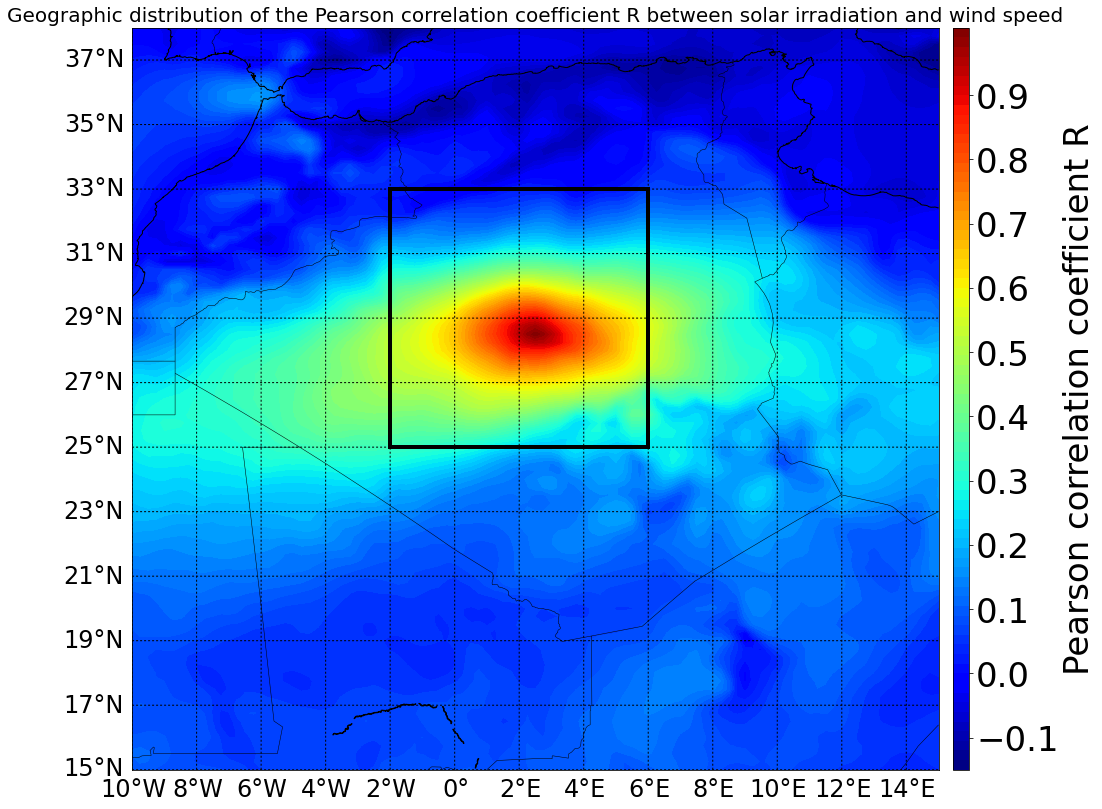

In [14]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(15,15))
m = Basemap(projection='cyl',llcrnrlat=15.,urcrnrlat=38.,llcrnrlon=-10.,urcrnrlon=15.,\
            #lat_1=20.,lat_2=40.,lat_0=30.,lon_0=232.
            resolution ='h',area_thresh=1000.)
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
#m.drawmapboundary()
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(15,40,2),dashes=[2,2],labels=[1,0,0,0],fontsize=24)
m.drawmeridians(np.arange(-10,15,2),dashes=[2,2],labels=[0,0,0,1],fontsize=24)
xpt,ypt = m(pearson_r.longitude,pearson_r.latitude)

X,Y = np.meshgrid(np.linspace(xpt[0],xpt[100],101),np.linspace(ypt[0],ypt[92],93))
im1 = m.contourf(X,Y,pearson_r,100,cmap=plt.cm.jet,latlon="True")
cb = m.colorbar(im1,"right",  size="2%", ticks=np.arange(-1, 1, 0.1), pad=0.2)

plt.gca().add_patch(Rectangle((-2,25),8,8, edgecolor='black', facecolor='none', lw=4))

cb.set_label(r"Pearson correlation coefficient R", size=34)
cb.ax.tick_params(labelsize=34)
plt.title('Geographic distribution of the Pearson correlation coefficient R between solar irradiation and wind speed', size=20)
plt.show();
